![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install livelossplot

In [3]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.losses import MeanSquaredError, MeanAbsoluteError

# Celda 3
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


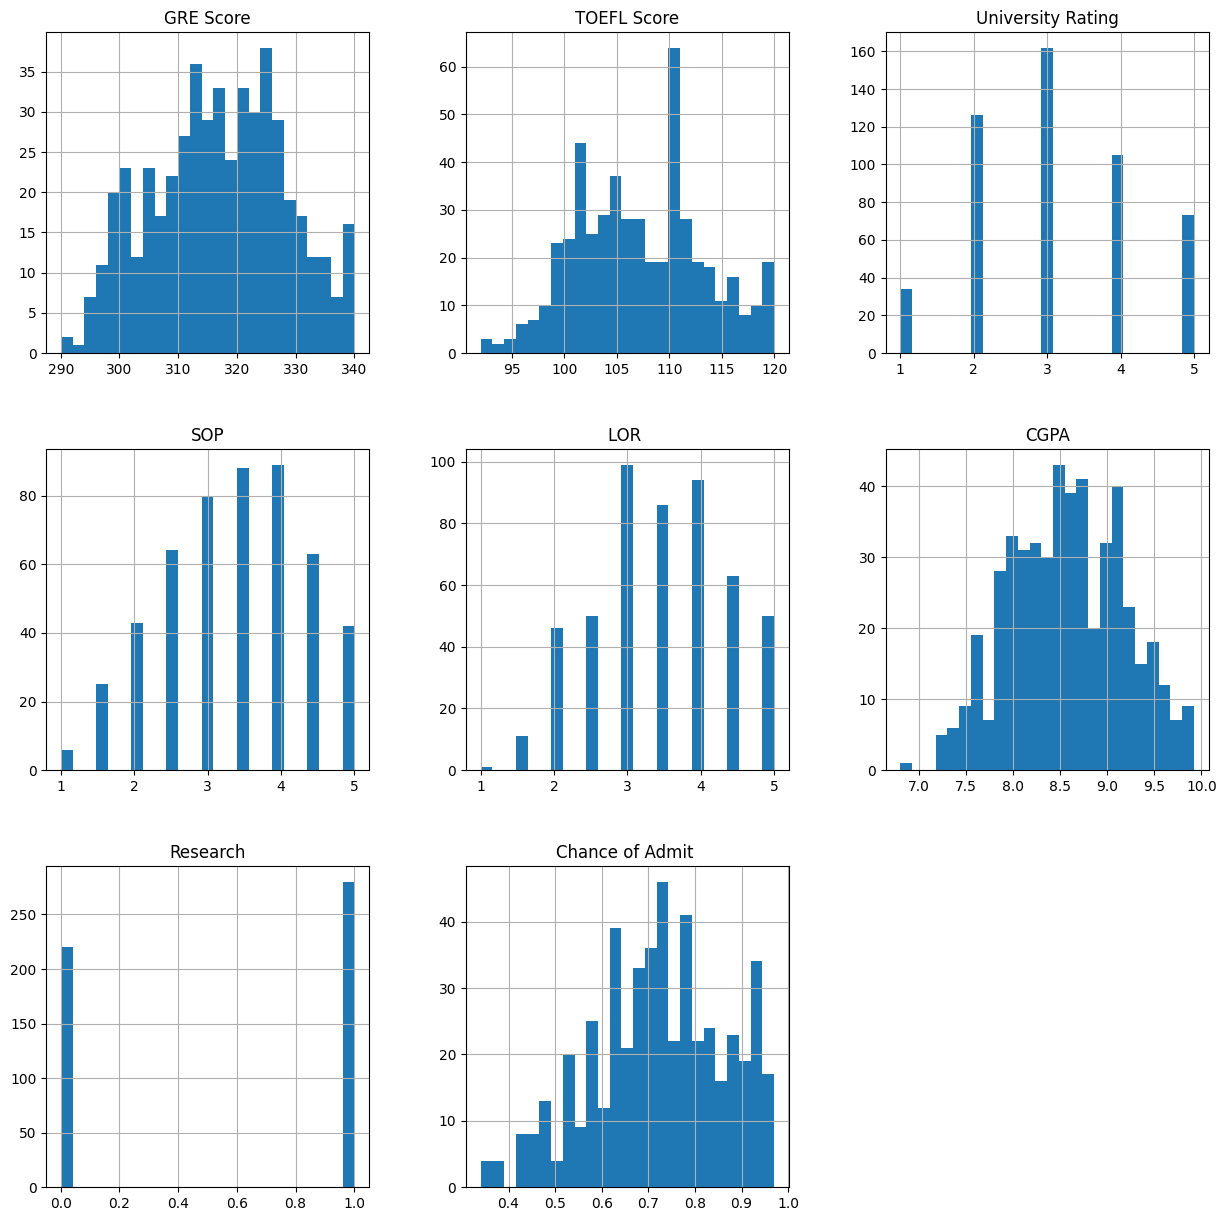

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
data.reset_index('Serial No.', inplace=True)
data.drop(columns=['Serial No.'], inplace=True)

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(data[data.columns[-1]]), columns=['labels'])

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [9]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [11]:
# # Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

1  output variables
7 input variables
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

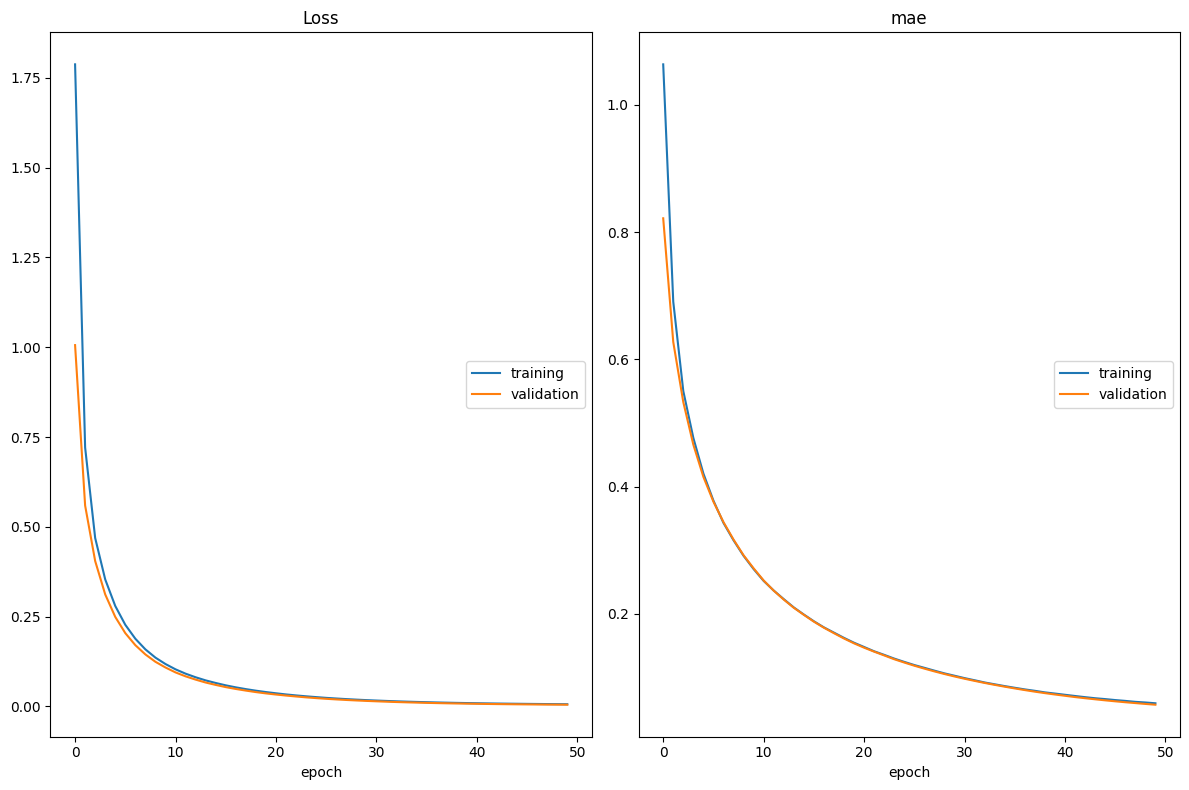

Loss
	training         	 (min:    0.006, max:    1.787, cur:    0.006)
	validation       	 (min:    0.005, max:    1.006, cur:    0.005)
mae
	training         	 (min:    0.059, max:    1.064, cur:    0.059)
	validation       	 (min:    0.057, max:    0.822, cur:    0.057)
11/11 [==============================] - 1s 59ms/step - loss: 0.0063 - mae: 0.0592 - val_loss: 0.0050 - val_mae: 0.0570


In [13]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          verbose=1,
          epochs=50,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [14]:
mse, mae = model.evaluate(X_test, Y_test)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step - loss: 0.0050 - mae: 0.0570
Mean Absolute Error (MAE): 0.05695434659719467
Mean Squared Error (MSE): 0.004981966223567724


Usando el optimizador gradiente descendente estocastico, MSE como función de perdida y con 50 epocas para modelar y mejorar la función de perdida. Con estos parametros obtenemos un MAE = 0.0493 y MSE = 0.0044. Estos resultados  indican un buen desempeño del modelo en términos de precisión y generalización, lo que sugiere que es un modelo útil para predecir la probabilidad de admisión de los estudiantes.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

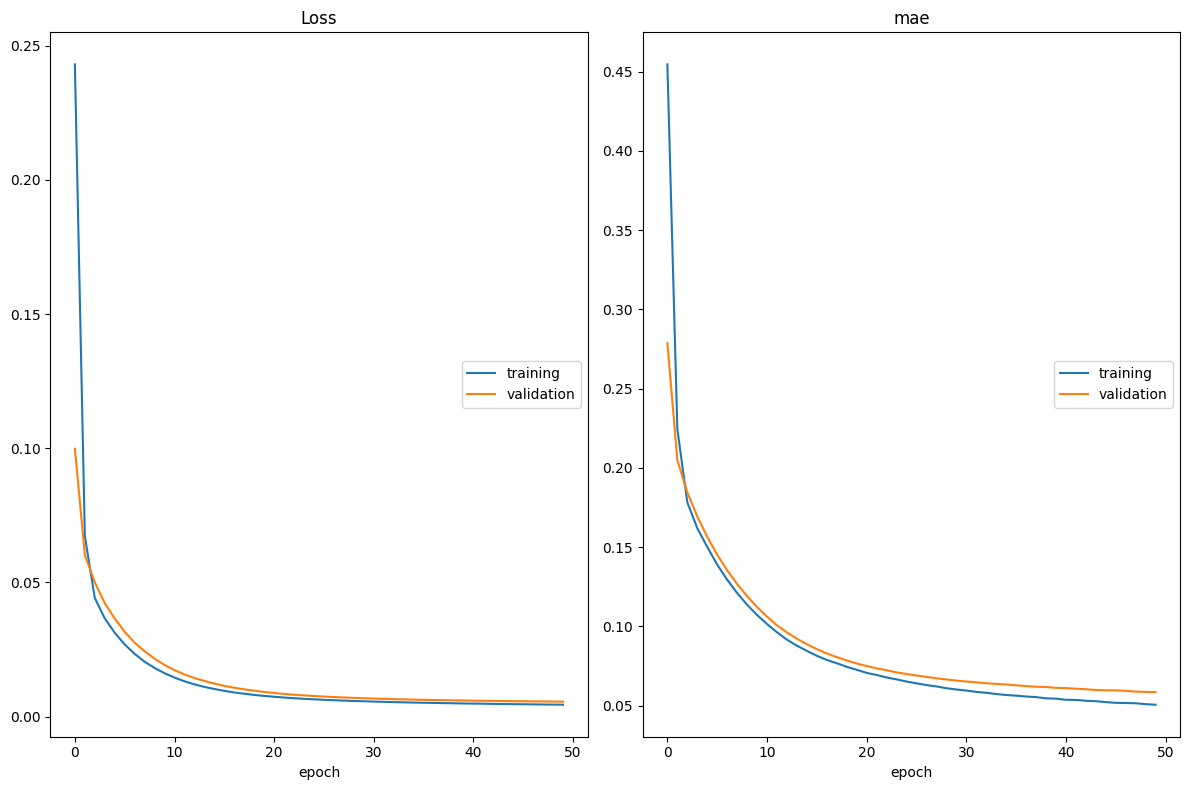

Loss
	training         	 (min:    0.004, max:    0.243, cur:    0.004)
	validation       	 (min:    0.006, max:    0.100, cur:    0.006)
mae
	training         	 (min:    0.051, max:    0.455, cur:    0.051)
	validation       	 (min:    0.058, max:    0.279, cur:    0.058)
5/5 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0585
MAE: 0.058489393442869186
MSE: 0.005565430968999863


In [15]:
# Celda 2
model = Sequential()

model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

print(model.summary())

# Compilar el modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=50,
          callbacks=[PlotLossesKeras()])

# Obtener las métricas
mse1, mae1 = model.evaluate(X_test, Y_test)
print("MAE:", mae1)
print("MSE:", mse1)

Usando el optimizador gradiente descendente estocastico, MSE como función de perdida, con 50 epocas para modelar y se usa una función de activación 'Relu' dado que la variable objetivo es positiva en un rango de 0 a 1. Con estos parametros obtenemos un MAE = 0.05784 y MSE = 0.0052. Estos resultados indican un buen desempeño del modelo en términos de precisión y generalización, lo que sugiere que es un modelo útil para predecir la probabilidad de admisión de los estudiantes.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 0.0497 - mean_absolute_error: 0.1831 - mean_squared_error: 0.0497 - val_loss: 0.0176 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0176
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0190 - mean_absolute_error: 0.1106 - mean_squared_error: 0.0190 - val_loss: 0.0078 - val_mean_absolute_error: 0.0679 - val_mean_squared_error: 0.0078
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0887 - mean_squared_error: 0.0125 - val_loss: 0.0064 - val_mean_absolute_error: 0.0600 - val_mean_squared_error: 0.0064
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0824 - mean_squared_error: 0.0109 - val_loss: 0.0066 - val_mean_absolute_error: 0.0641 - val_mean_squared_error: 0.0066
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0854

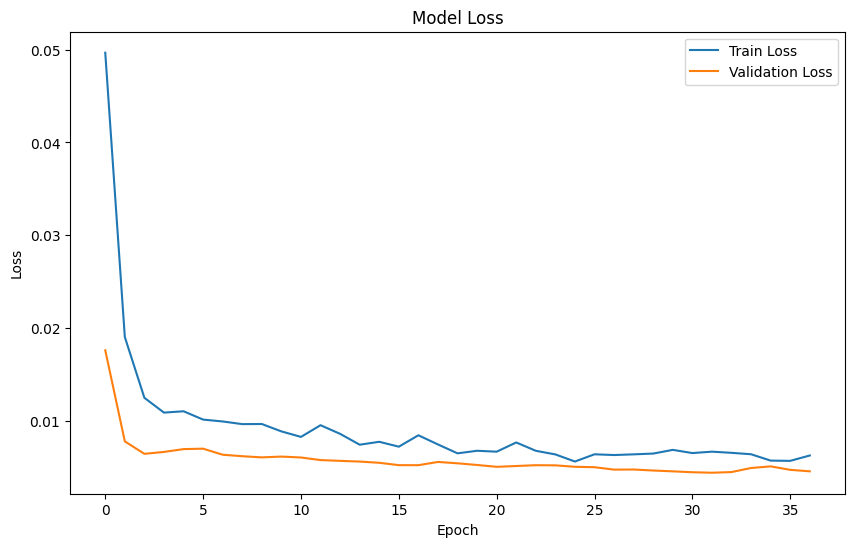

Mean Absolute Error: 0.05320313945412636
Mean Squared Error: 0.004743942990899086


In [16]:
# Celda 3
# Preparación de los datos ya realizada en la celda anterior

# Definición de dimensiones de salida y variables de interés
output_var = Y_train.shape[1]
dims = X_train.shape[1]

# Limpieza de sesiones anteriores
K.clear_session()

# Creación del modelo
model = Sequential()
model.add(Dense(128, input_shape=(dims,), activation='relu'))  # Capa de entrada
model.add(Dropout(0.5))  # Dropout del 50% para regularización
model.add(Dense(64, activation='relu'))  # Segunda capa oculta
model.add(Dropout(0.5))  # Segundo Dropout
model.add(Dense(output_var, activation='sigmoid'))  # Capa de salida

# Configuración del optimizador y función de pérdida
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Configuración de Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Visualización de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Evaluación del modelo
evaluation = model.evaluate(X_test, Y_test, verbose=0)
print(f'Mean Absolute Error: {evaluation[1]}')
print(f'Mean Squared Error: {evaluation[2]}')


# Análisis del gráfico y resultados del entrenamiento:
1.   Convergencia Rápida: El modelo reduce rápidamente la pérdida en las primeras épocas, lo que indica una buena tasa de aprendizaje inicial.
2.   Estabilización de la Pérdida de Validación: Aunque hay fluctuaciones menores en la pérdida de validación, el modelo parece alcanzar una estabilidad sin signos claros de sobreajuste, ya que la pérdida de validación no aumenta con más épocas.
3.  Errores Absoluto y Cuadrático Medios: Los valores finales para el error absoluto medio (MAE) y el error cuadrático medio (MSE) son bajos, lo que sugiere que el modelo está realizando predicciones precisas. Esto es indicativo de un buen rendimiento en el conjunto de prueba.

# Justificaciones:
*   Función de pérdida: Elegimos "mean_squared_error" porque es una opción estándar para problemas de regresión. Mide la media de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores estimados y los reales. Esto hace que sea más sensible a los errores grandes, lo cual es útil cuando es crítico no subestimar las probabilidades de admisión.

*   Optimizador: Seleccionamos "adam" por su eficiencia computacional y porque automáticamente ajusta la tasa de aprendizaje durante el entrenamiento. Es efectivo en casos con grandes volúmenes de datos y parámetros, y en general, funciona bien en prácticamente cualquier tipo de problema de redes neuronales sin necesidad de mucha configuración inicial.

*   Número de épocas: Se configuró un número inicial de 100 épocas con la intención de dar suficiente tiempo para que el modelo aprenda de los datos. El uso de "early stopping" nos ayuda a detener el entrenamiento tan pronto como el rendimiento en el conjunto de validación comienza a decaer, previniendo así el sobreajuste.

*   Número de neuronas: Las capas ocultas tienen 128 y 64 neuronas, respectivamente. La primera capa más grande (128 neuronas) permite al modelo aprender representaciones más complejas y capturar mejor la varianza en los datos. La segunda capa más pequeña (64 neuronas) ayuda a refinar estas representaciones hacia la salida. Este diseño de "embudo" es común en las redes neuronales, permitiendo una compresión gradual de la información a través de la red.

*   Dropout: Implementamos una tasa de dropout del 50% después de cada capa oculta para regularizar el modelo, minimizando el riesgo de sobreajuste. El dropout ayuda al modelo a ser menos sensible a la especificidad de los datos de entrenamiento, mejorando así su capacidad de generalización.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

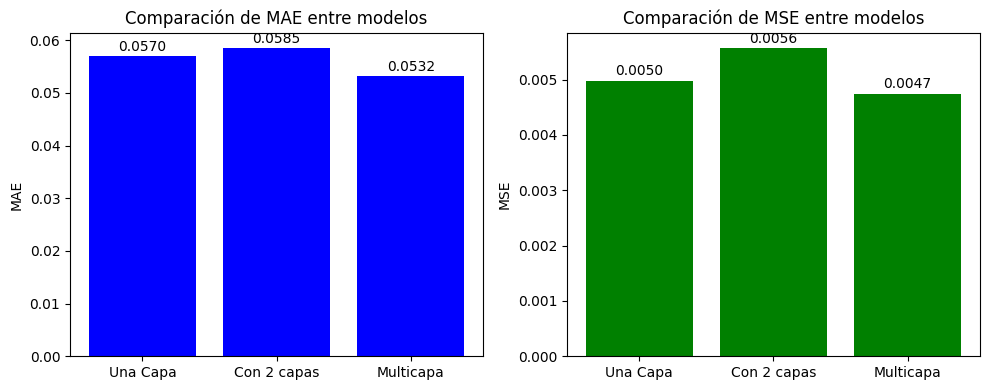

In [17]:
import matplotlib.pyplot as plt


mae_values = [mae, mae1, evaluation[1]]
mse_values = [mse, mse1, evaluation[2]]

# Nombres de los modelos
models = ['Una Capa', 'Con 2 capas', 'Multicapa']

# Crear gráficos

plt.figure(figsize=(10, 4))

# Gráfico para MAE
plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color='blue')
plt.title('Comparación de MAE entre modelos')
plt.ylabel('MAE')
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', color='black')

# Gráfico para MSE
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color='green')
plt.title('Comparación de MSE entre modelos')
plt.ylabel('MSE')
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.0001, f"{v:.4f}", ha='center', color='black')

plt.tight_layout()
plt.show()


Hay una clara tendencia de disminución en los valores tanto de MAE como de MSE a medida que se aumenta la complejidad del modelo de la red neuronal. Esto sugiere que añadir más capas puede ser efectivo para captar relaciones más complejas en los datos, lo que resulta en una mayor precisión del modelo.

Aunque la mejora entre "Con 2 capas" y "Multicapa" en términos de MAE y MSE es relativamente pequeña, indica que cada capa adicional contribuye a una mayor capacidad del modelo para generalizar mejor los datos de entrada. Esto es especialmente importante en problemas de predicción donde la relación entre las variables de entrada y la salida es compleja.

El modelo "Multicapa" sería preferible debido a su menor error y mejor capacidad de predicción. Sin embargo, este beneficio debe ser ponderado contra el aumento en los recursos computacionales y el tiempo necesario para entrenar modelos más complejos.